## Plots and tables

In [2]:
import numpy as np
import pandas as pd
import os
from time import time
import gzip, pickle
import datetime
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns

np.set_printoptions(precision=2)
projdir = "/Users/helmutsimon/repos/bayescoalescentest/shared"
if not os.getcwd() == projdir:
    os.chdir(projdir)
import run_MCMC

path = "/Users/helmutsimon/Google Drive/Genetics/bayes_coalescent_est/data"
if not os.getcwd() == path:
    os.chdir(path)

job_no = 'sp027'

file_path = 'tree_simulations_' + job_no
with gzip.open(file_path, 'rb') as results:
    results = pickle.load(results)
sfs, true_branch_lengths, empirical_prior, mu, sd = results[:5]
print(sfs)    
    
job_no = 'sp027e'

fname = 'branch_vars_' + job_no + '.pklz'
with gzip.open(fname, 'rb') as brvars:
    brvars = pickle.load(brvars)

print(brvars.shape)
n = brvars.shape[0] + 1

properties = dict()
properties['Author'] = 'Helmut Simon'

[3, 0, 0, 0, 5, 0, 4, 0, 0, 0, 0]
(11, 1000000)


Plot branch lengths

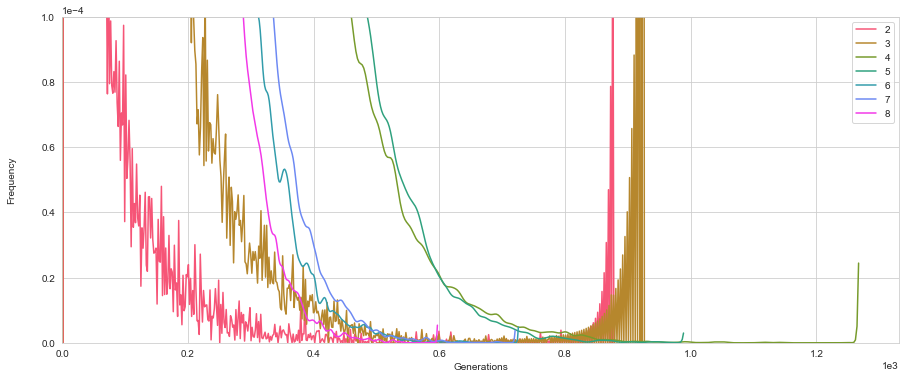

array([  2.18,  13.54,  84.35, 132.32,  65.05,  80.4 ,  63.07])

In [75]:
pdfname = 'brfig' + job_no + 'a.pdf'
properties['Title'] = 'Posterior distribution of branch lengths'
properties['Subject'] = 'Datafile: ' + fname
labels = np.arange(2, n + 1)
fig = run_MCMC.print_pds(pdfname, brvars, labels, truevalues=None, properties=properties, \
                         savepdf=False, ylim=1e-4)
plt.show()
np.mean(brvars, axis=1)

Plot coalescence times

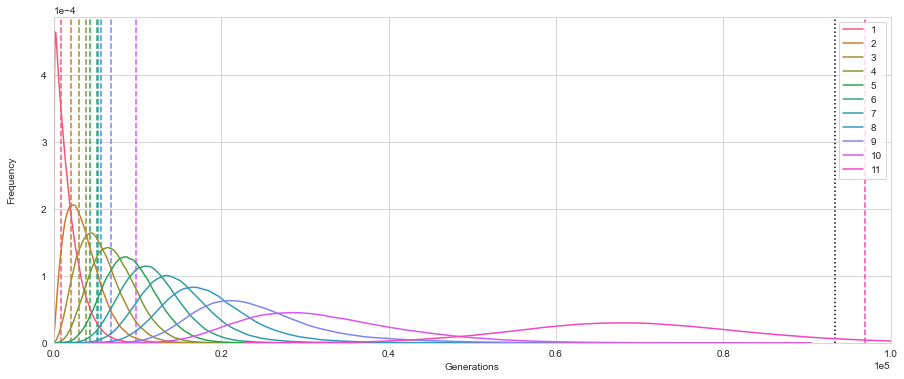

93333.33333333334
15000.000000000002
[  836.43  2051.72  2973.47  3880.45  4309.26  5110.75  5332.98  5599.63
  6789.25  9860.26 96873.71]
[ 1705.45  3471.08  5282.32  7181.46  9252.72 11629.06 14549.16 18377.41
 24131.07 32101.   69292.32]


In [105]:
branches_rev = np.flipud(brvars)
coal_times = np.cumsum(branches_rev, axis=0)
true_coal_times =  np.cumsum(true_branch_lengths[::-1])
length = 1000
mrate = 5e-8
seq_mutation_rate = length * mrate
n_seq = np.arange(1, n)
thom = np.sum(sfs * n_seq) / (n * seq_mutation_rate)
var_thom = np.sum(sfs * n_seq * n_seq) / (2 * n * seq_mutation_rate) ** 2

pdfname = 'coalfig' + job_no + '.pdf'
properties['Title'] = 'Posterior distribution of coalescence times.'
properties['Subject'] = 'Datafile: ' + fname
labels = np.arange(1, n)
fig = run_MCMC.print_pds(pdfname, coal_times, labels, truevalues=true_coal_times, properties=properties,\
                         savepdf=True, thom=thom, xlim=1e5)
plt.show()
print(thom)
print(np.sqrt(var_thom))
print(true_coal_times)
print(np.mean(coal_times, axis=1))

Plot ancestral process

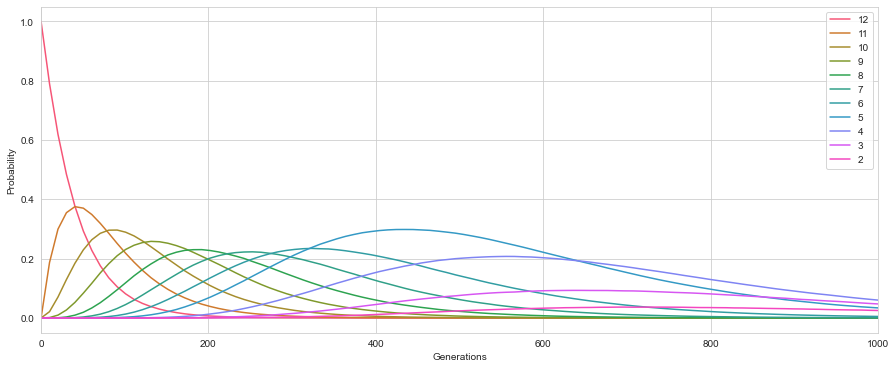

In [58]:
ntimes = 100
tlim = 1e3
x_values = np.linspace(0, tlim, num=ntimes)

#a_proc = run_MCMC.ancestral_process(brvars, ntimes, tlim)
sns.set_style("whitegrid")
cols = sns.husl_palette(n_colors=n - 1, s=0.9, l=0.6)
labels = np.arange(n, 1, -1)
pdfname = 'anc_fig_' + job_no + '.pdf'
properties['Title'] = 'Ancestral process.'
with PdfPages(pdfname) as pdf:
    fig = plt.figure(figsize=(15, 6))
    for row, col, label in zip(a_proc, cols, labels):
        sns.lineplot(x=x_values, y=row, color=col, label=label)
    plt.xlabel('Generations')
    plt.ylabel('Probability')
    plt.xlim([0, 1000])        #
    plt.legend()
    #plt.vlines(true_coal_times, 0, 1, colors=cols, linestyles='dashed')
    d = pdf.infodict()
    for key in properties:
        d[key] = properties[key]
    pdf.savefig(fig, bbox_inches='tight')
plt.show()

Plot posterior distribution of TMRCA

20.7
14.3
27.9
3.5
0.12112443375074289
22.7
13.8
35.3
5.5


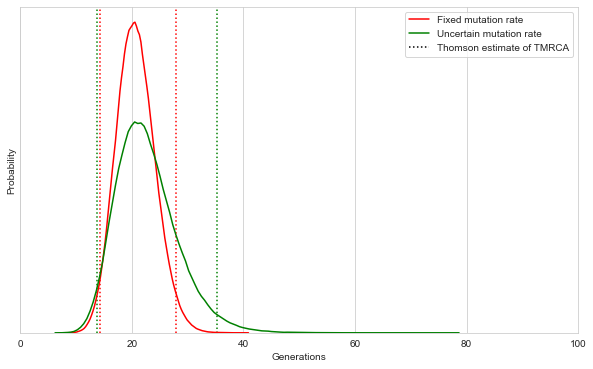

22.7
13.8
35.3
5.5


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:56: UserWarning: Unknown infodict keyword: keywords


In [97]:
pdfname = 'tmrca_8_10_v_8_11.pdf'
properties['Title'] = 'Comparison of TMRCA posterior distributions'
properties['keywords'] = 'jobs 8_10 & 8_11'
with PdfPages(pdfname) as pdf:
    fig = plt.figure(figsize=(10, 6))
    job_no = 'ncn_8_10'
    fname = 'branch_vars_' + job_no + '.pklz'
    with gzip.open(fname, 'rb') as brvars:
        brvars = pickle.load(brvars)
    tmrca_vars = np.sum(brvars, axis=0)
    sns.kdeplot(tmrca_vars, color='r', label='Fixed mutation rate')

    print("%.1f" % np.mean(tmrca_vars))
    print("%.1f" % np.quantile(tmrca_vars, 0.025))
    print("%.1f" % np.quantile(tmrca_vars, 0.975))
    print("%.1f" % np.std(tmrca_vars))
    ymax = plt.gca().get_ylim()[1]
    print(ymax)
    plt.vlines(np.quantile(tmrca_vars, 0.025), 0, ymax, colors='r', linestyle='dotted')
    plt.vlines(np.quantile(tmrca_vars, 0.975), 0, ymax, colors='r', linestyle='dotted')

    job_no = 'ncn_8_11'
    fname = 'branch_vars_' + job_no + '.pklz'
    with gzip.open(fname, 'rb') as brvars:
        brvars = pickle.load(brvars)
    tmrca_vars = np.sum(brvars, axis=0)
    sns.kdeplot(tmrca_vars, color='g', label='Uncertain mutation rate')

    print("%.1f" % np.mean(tmrca_vars))
    print("%.1f" % np.quantile(tmrca_vars, 0.025))
    print("%.1f" % np.quantile(tmrca_vars, 0.975))
    print("%.1f" % np.std(tmrca_vars))

    plt.vlines(np.quantile(tmrca_vars, 0.025), 0, ymax, colors='g', linestyle='dotted')
    plt.vlines(np.quantile(tmrca_vars, 0.975), 0, ymax, colors='g', linestyle='dotted')

    plt.vlines(thom, 0, ymax, colors='k', linestyle='dotted', label='Thomson estimate of TMRCA')

    plt.xlim([0, 1500])
    plt.ylim([0, ymax])
    plt.xlabel('Generations')
    plt.ylabel('Probability')
    plt.yticks([])
    plt.legend()
    plt.show()
    print("%.1f" % np.mean(tmrca_vars))
    print("%.1f" % np.quantile(tmrca_vars, 0.025))
    print("%.1f" % np.quantile(tmrca_vars, 0.975))
    print("%.1f" % np.std(tmrca_vars))
    
    d = pdf.infodict()
    for key in properties:
        d[key] = properties[key]
    pdf.savefig(fig, bbox_inches='tight')
plt.show()

In [ ]:
a_proc_df = pd.DataFrame(a_proc)
a_proc_df.to_csv('anc_proc_' + job_no + '.csv')

Create heatmap of ancestral process.

In [31]:
path = "/Users/helmutsimon/Google Drive/Genetics/bayes_coalescent_est/data"
if not os.getcwd() == path:
    os.chdir(path)

!scp helmut@fisher.rsb.anu.edu.au:./helmutsimonpython/helmutsimonpython/bayes_sfs/data/sample_tree_matrices.py_stmf050.log .
!scp helmut@fisher.rsb.anu.edu.au:./helmutsimonpython/helmutsimonpython/bayes_sfs/data/mxs_stmf050 .

sample_tree_matrices.py_stmf050.log           100% 1832    72.7KB/s   00:00    
mxs_stmf050                                   100%   58MB   2.0MB/s   00:29    


[5, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0]


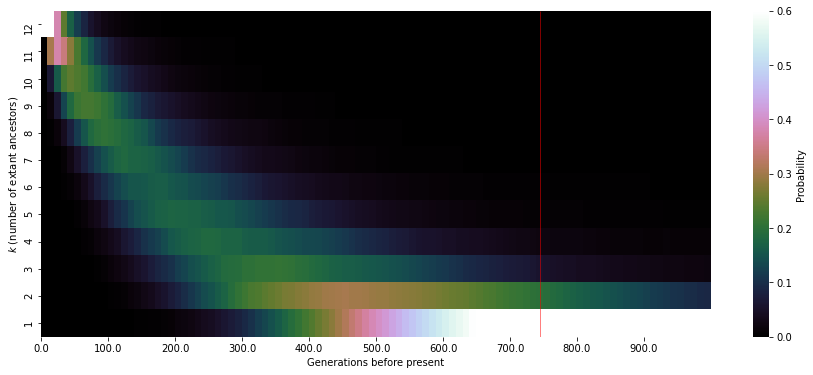

In [3]:
file_path = 'tree_simulations_ncn12_10' 
with gzip.open(file_path, 'rb') as results:
    results = pickle.load(results)
sfs, true_branch_lengths, empirical_prior, mu, sd = results[:5]
print(sfs)  
#true_coal_times =  np.cumsum(true_branch_lengths[::-1])
#print(true_coal_times / 60)

fname = 'branch_vars_ncn12_10a.pklz'
with gzip.open(fname, 'rb') as brvars:
    brvars = pickle.load(brvars)
n = brvars.shape[0] + 1

ntimes = 100
tlim = 1000
step = tlim / ntimes
x_values = np.linspace(0, tlim, num=ntimes)

a_proc = run_MCMC.ancestral_process(brvars, ntimes, tlim)
heat_table = pd.DataFrame(a_proc, index=np.arange(n, 0, -1))
pdfname = 'anc_heatmap_ncn12.pdf'
properties['Title'] = 'Ancestral process heatmap (neutral).'
properties['Subject'] = 'Datafile: ' + fname
with PdfPages(pdfname) as pdf:
    fig = plt.figure(figsize=(15, 6))
    sns.heatmap(heat_table, vmin=0, vmax=0.6, cmap="cubehelix", cbar_kws={'label': 'Probability'}, linewidth=0)
    plt.xticks(np.arange(0, 100, 10), np.arange(0, tlim, tlim / 10))
    plt.xlabel('Generations before present')
    plt.ylabel('$k$ (number of extant ancestors)')
    ymax = plt.gca().get_ylim()[1]
    plt.vlines(447 / 6, 0, 100, colors='r', linewidth=0.5)
    d = pdf.infodict()
    for key in properties:
        d[key] = properties[key]
    #pdf.savefig(fig, bbox_inches='tight')
plt.show()

Table of posterior mean estimates from Nuu-Chah-Nulth data

In [92]:
from cogent3 import make_table

brlens = np.array([[  2.18,  13.54,  84.35, 132.32,  65.05,  80.4 ,  63.07, 0],\
                  [  2.58,  16.35, 105.94, 162.79,  81.48,  98.36,  78.74, 0]])
brlens[0, -1] = np.sum(brlens[0,:-1])
brlens[1, -1] = np.sum(brlens[1,:-1])

columns = ['k=' + str(i) for i in np.arange(2, 9)] + ['TMRCA']
index = ['Fixed mutation rate', 'Uncertainty in mutation rate']
brlens = pd.DataFrame(brlens, columns=columns)
brlens.insert(loc=0, column='', value=index)
print(brlens)
t = make_table(data_frame=brlens, \
               title="Posterior mean estimates of branch lengths and the TMRCA for the sub-sample of 8 \
mitochondrial sequences from the Nuu-Chah-Nulth population. Estimates with and without \
taking account of uncertainty in the estimate of mutation rate are shown.")
for c in columns:
    t.format_column(c, "%.1f")
t.write("ncn_brl.tex", label="tab:ncn_brl", justify="lccccccccc")

                                  k=2    k=3     k=4     k=5    k=6    k=7  \
0           Fixed mutation rate  2.18  13.54   84.35  132.32  65.05  80.40   
1  Uncertainty in mutation rate  2.58  16.35  105.94  162.79  81.48  98.36   

     k=8   TMRCA  
0  63.07  440.91  
1  78.74  546.24  


In [229]:
job_no = '004'
results = pd.read_csv('vary_seg_sites_results_' + job_no + '.csv', sep=',', index_col=0)
r = results.shape[1]
results.insert(loc=0, column='$S_n$', value=results.index)
header = ['$S_n$'] + ['k=' + str(j) for j in np.arange(2, r + 2)] + ['MSE']
#results['TMRCA'] = results.sum(axis=1)
#print(results)
row0 = results.iloc[0, :][1:]
print(np.linalg.norm(row0))
mse_col = list()
for i, row in results.iterrows():
    mse = np.linalg.norm(row[1:] - row0)
    mse_col.append(mse)
    
    
results['MSE'] = mse_col
results.columns = header
t = make_table(data_frame=results, title="Point estimates of branch lengths for $k=2, \mathellipsis ,12$\
    for a sample of size $n=12$ and a range of values of $S_n$ shown in the left hand column. \
    The first row of the table contains the true branch lengths. The last column shows the MSE of each estimate.")

justify = "r" * (results.shape[1] + 1)
for c in results.columns[1:]:
    t.format_column(c, "%.0f")
t.write('vss_results_scrap.tex', label='tab:vss', justify=justify)
t

16669.322241485785


True,16232,2277,699,528,72,485,1200,1101,293,2086,1055,0
10,7,140,1558,813,1267,1821,2068,2116,1700,1525,1421,16615
60,204,399,2664,741,1510,3422,2286,1498,1079,809,668,16695
110,4,438,7074,978,1293,3069,1795,1064,727,571,528,17856
160,12143,2590,903,892,902,1115,1165,1154,1135,1039,969,4460
210,13832,1241,913,862,871,957,1029,1160,1079,1192,1100,3050
260,13136,1393,773,606,775,952,1297,1170,1155,1228,1089,3547
310,13684,1472,812,729,636,825,1041,1079,1015,1282,1368,2986
360,11883,795,673,857,1216,1390,1561,1188,1113,995,947,5035
410,16015,1474,498,363,628,830,1122,1192,1233,1248,941,1673
460,17248,2173,885,618,561,1014,1088,960,927,937,978,1834


In [221]:
def scrap():
    return 1, 2, 3, 4

a, b, c = scrap()
a, b, c

ValueError: too many values to unpack (expected 3)